# Unnormalized Bilateral Filter

Test UBF on a simple case.

In [ ]:
import os
os.environ['JAX_PLATFORM_NAME'] = 'cpu'

imporscripts.despeckle
import jax.numpy as jnp
import matplotlib.pyplot as plt
from scripts.mubf import MUBF

INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory


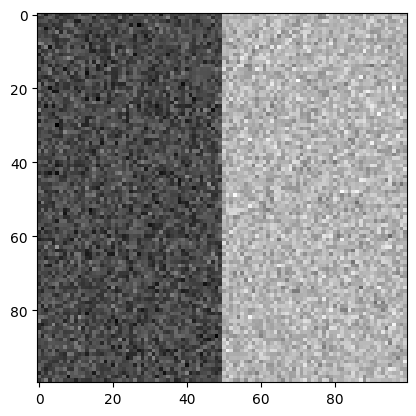

In [2]:
key = jax.random.PRNGKey(0)                           
img = jax.random.normal(key, (100, 100))             
img = img * 0.1 + 0.5                                 

img = img.at[:, :50].add(0.25)
img = img.at[:, 50:].add(0.75)

plt.imshow(img, cmap='gray');

Iterations: 100%|██████████| 20/20 [00:01<00:00, 19.79it/s]


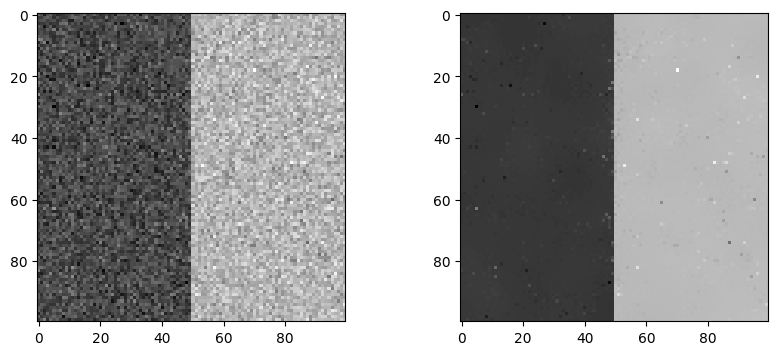

In [3]:
S = img.reshape(100, 100, 1)
L = img.reshape(100, 100, 1)

mubf = MUBF()
S_ubf, error = mubf.filter(
    target=S, 
    guides=[L], 
    sigma_spatial=2, 
    sigma_guides=[0.1], 
    alpha=1, 
    n_iterations=20, 
    n_blocks=1)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(L[..., 0], cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(S_ubf[..., 0], cmap='gray')

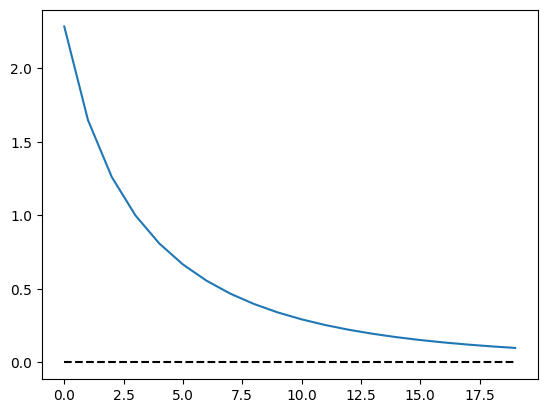

In [4]:
plt.plot(error)
plt.plot(jnp.arange(len(error)), jnp.zeros_like(jnp.array(error)), 'k--')